## DATA ANALYSIS CAPSTONE PROJECT - BLINKIT

#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Raw Data

In [5]:
df = pd.read_csv('BlinkIT Grocery Data.csv')

#### Import Sample Data

In [7]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


#### Size of Data

In [9]:
print("size of data:", df.shape)

size of data: (8523, 12)


#### Field info

In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [13]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Data Cleaning

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [16]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                         'low fat' : 'Low Fat',
                                                         'reg': 'Regular'})

In [17]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#### BUSINESS REQUIREMENTS

#### KPI's REQUIREMENTS

In [20]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of items sold
no_of_items_sold = df['Sales'].count()

#Average ratings
avg_ratings = df['Rating'].mean()

#Display

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"No of items sold: {no_of_items_sold:,.0f}")
print(f"Average ratings: {avg_ratings:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
No of items sold: 8,523
Average ratings: 4.0


#### Charts Requirements

##### Total Sales by Fat Content

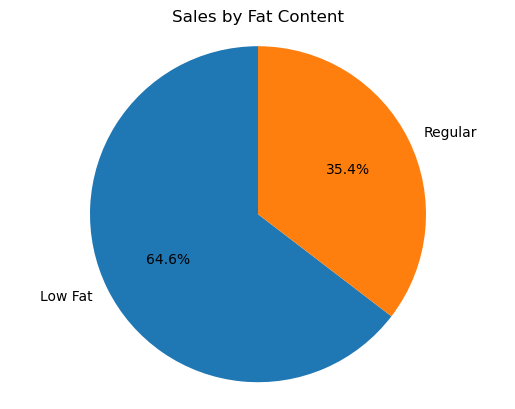

In [23]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct = '%.1f%%',
        startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### Total Sales by item type

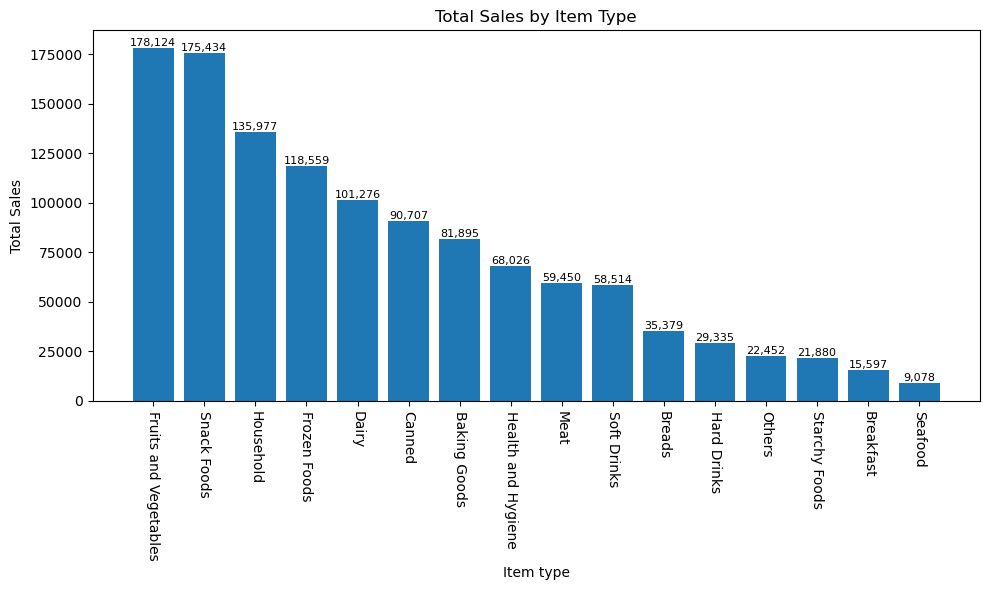

In [25]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation= -90)
plt.xlabel('Item type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha ='center', va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()

#### Fat Content by Outlet

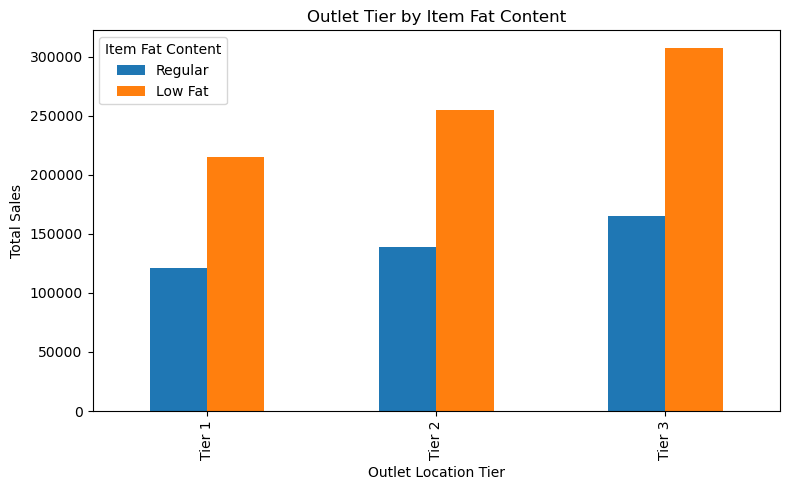

In [27]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar', figsize=(8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

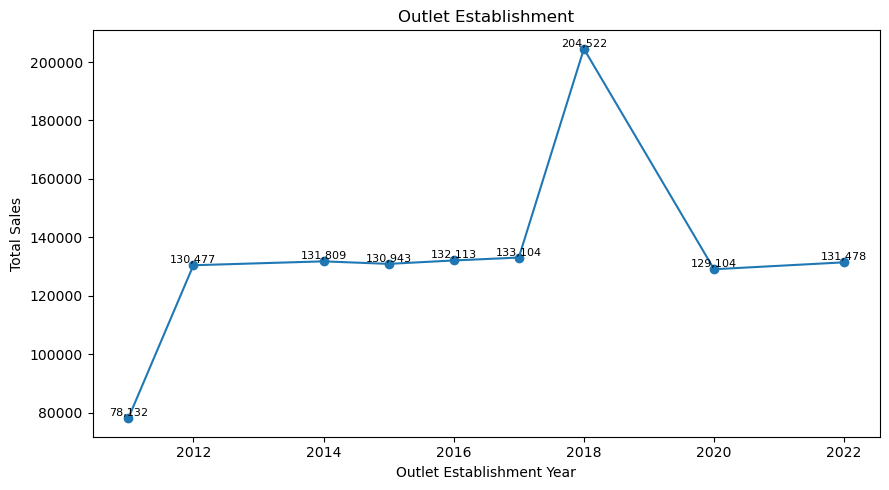

In [29]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize =(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
                           

##### Sales by Outlet Size

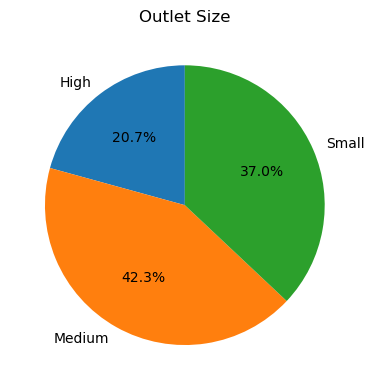

In [46]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels =sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()
           

#### Sales by Outlet Location

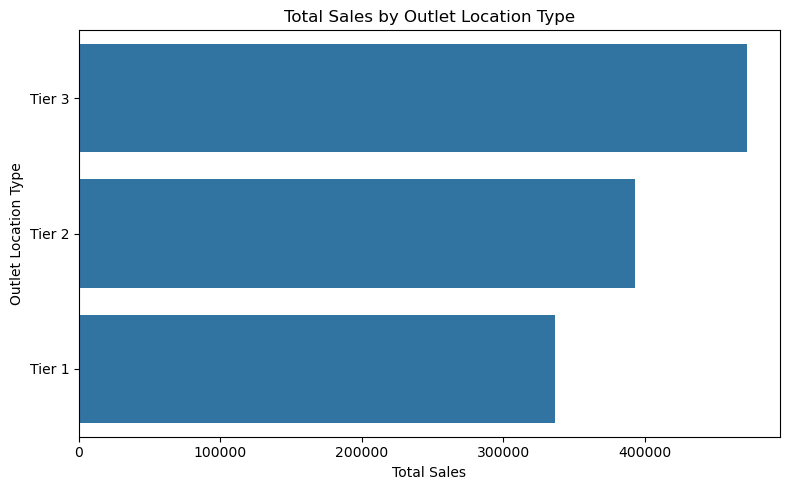

In [51]:
sales_by_location = df.groupby('Outlet Location Type').sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending =False)

plt.figure(figsize=(8,5)) # smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout() # Ensure layout fits without scroll
plt.show()